Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8    

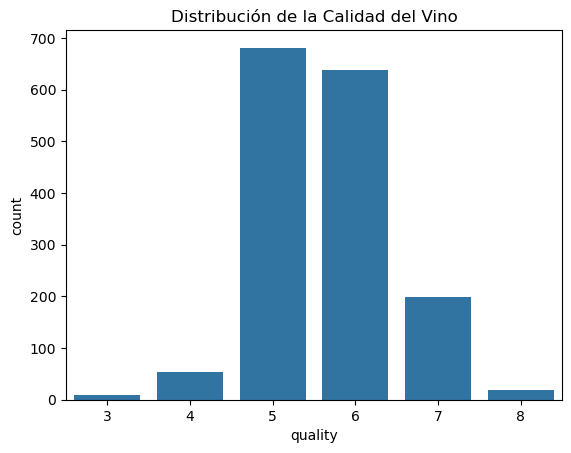

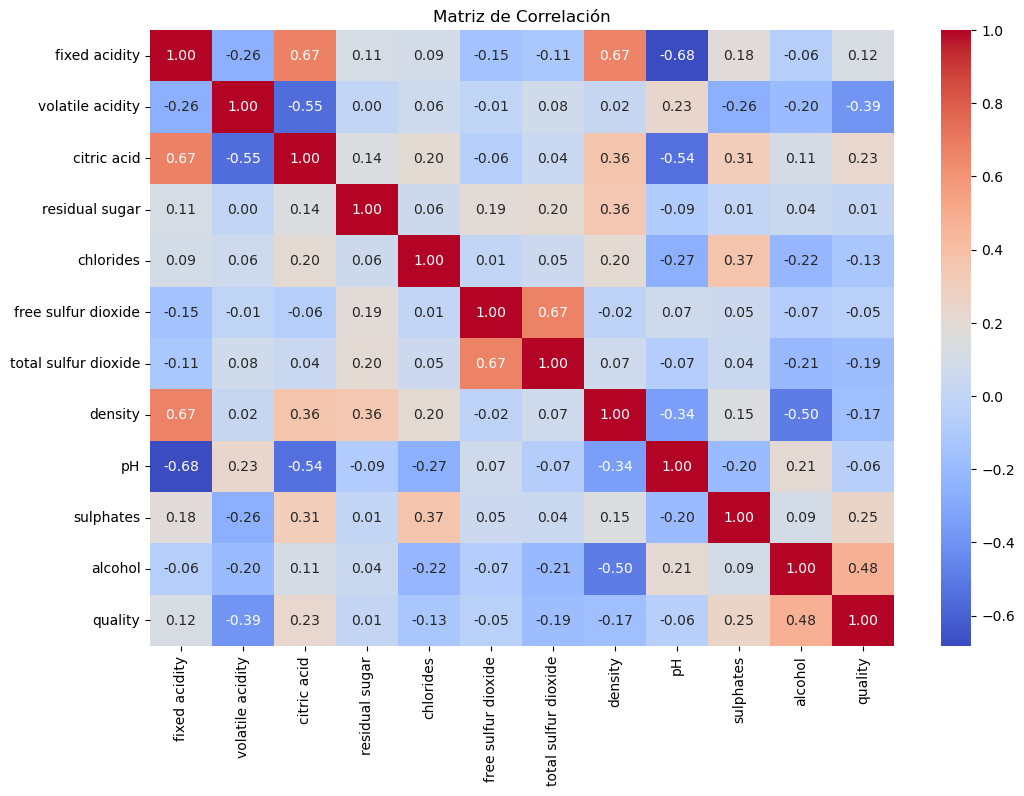


Valores nulos en el dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Características seleccionadas (top 8):
Index(['fixed acidity', 'volatile acidity', 'citric acid',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')

Evaluación del modelo:
Precisión: 0.5625
Recall: 0.5625
F1-Score: 0.5385

Reporte de Clasificación:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.77      0.67       130
           6       0.54      0.50      0.52       132
           7       0.52      0.33      0.41        42
 

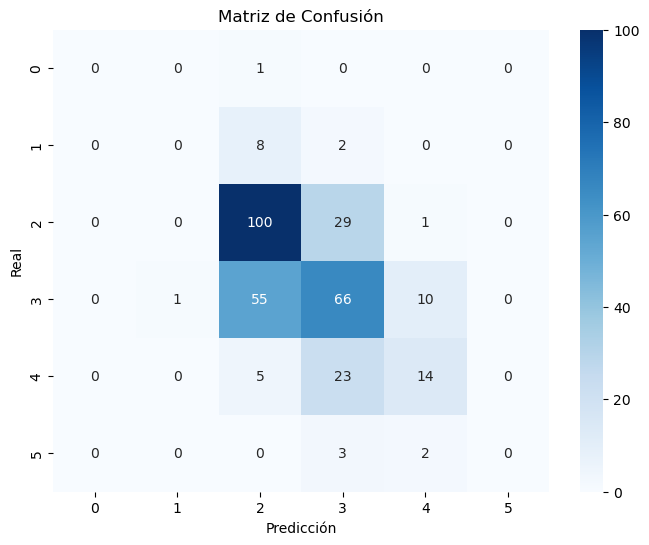

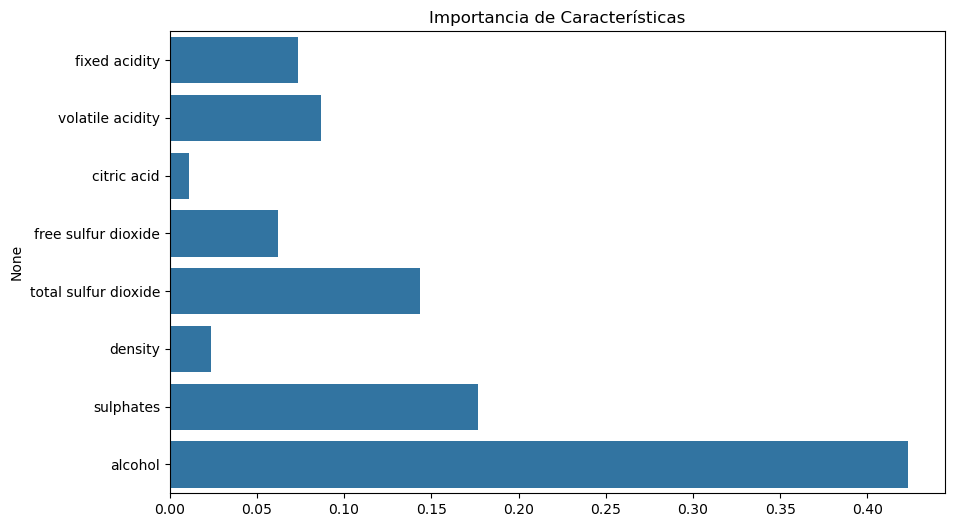

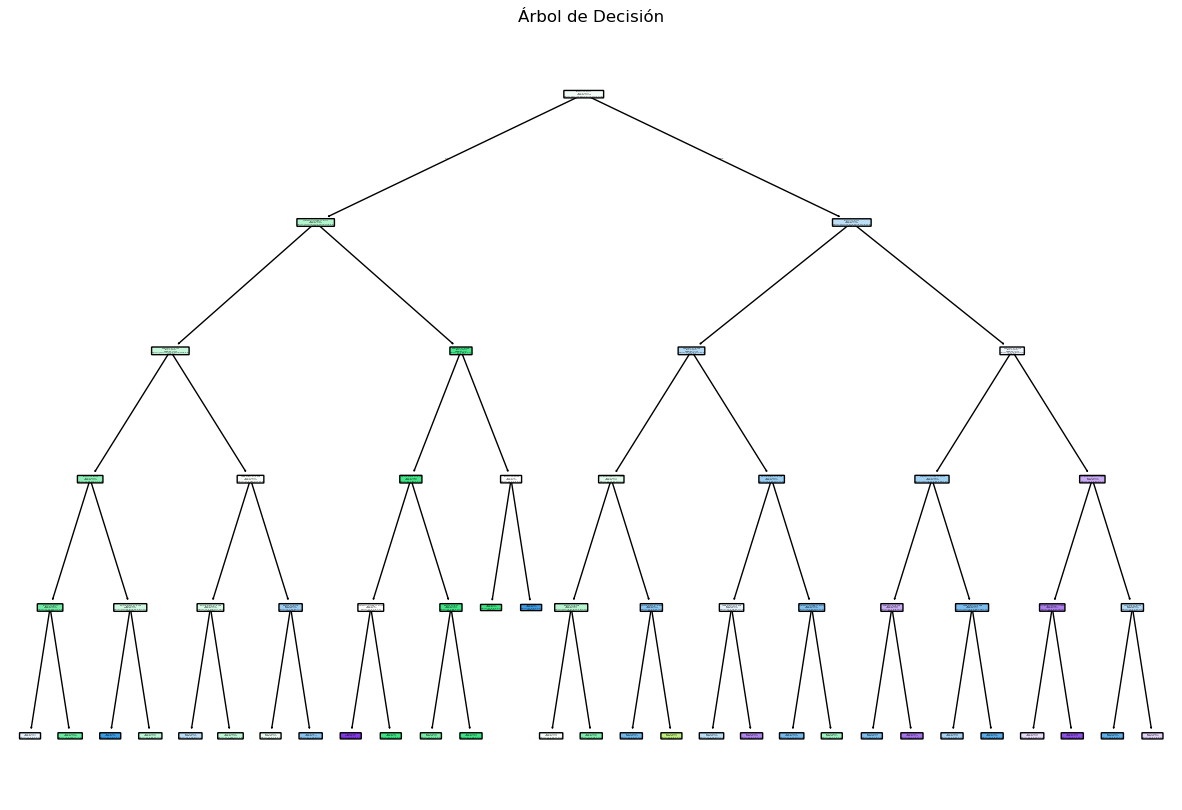


Interpretación de Resultados:
El modelo de árbol de decisión muestra las métricas de precisión, recall y F1-score que indican su desempeño en el conjunto de prueba.
A partir de la matriz de confusión y la importancia de las características, se puede analizar qué atributos contribuyen más a la predicción de la calidad del vino.


In [13]:
# Importar librerías necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# Paso 1: Cargar y explorar el dataset
df = pd.read_csv('winequality-red.csv')

# Mostrar las primeras filas y la información general
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())

# Descripción estadística
print("\nDescripción estadística:")
print(df.describe())

# Análisis exploratorio de la variable objetivo (quality)
print("\nDistribución de la variable objetivo 'quality':")
print(df['quality'].value_counts())
sns.countplot(x='quality', data=df)
plt.title('Distribución de la Calidad del Vino')
plt.show()

# Matriz de correlación para analizar relaciones entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Paso 2: Preprocesamiento de los datos
# Comprobar valores nulos
print("\nValores nulos en el dataset:")
print(df.isnull().sum())

# Escalado de las variables al rango [0, 1]
X = df.drop(columns=['quality'])
y = df['quality']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Paso 3: Selección de características
# Usamos SelectKBest para seleccionar las mejores características
selector = SelectKBest(chi2, k=8)
X_selected = selector.fit_transform(X_scaled, y)
print("\nCaracterísticas seleccionadas (top 8):")
print(X.columns[selector.get_support()])

# Paso 4: División del dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Paso 5: Entrenamiento del modelo de árbol de decisión
# Configuración de hiperparámetros para optimización
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Paso 6: Evaluación del modelo
y_pred = clf.predict(X_test)

# Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
print("\nEvaluación del modelo:")
print(f"Precisión: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, zero_division=1))

# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Paso 7: Visualización de Resultados
# Importancia de características
feature_importances = clf.feature_importances_
features = X.columns[selector.get_support()]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Importancia de Características')
plt.show()

# Visualización del árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=features, class_names=[str(i) for i in sorted(y.unique())], filled=True, rounded=True)
plt.title('Árbol de Decisión')
plt.show()

# Paso 8: Interpretación de Resultados
# Resumen del rendimiento del modelo
print("\nInterpretación de Resultados:")
print("El modelo de árbol de decisión muestra las métricas de precisión, recall y F1-score que indican su desempeño en el conjunto de prueba.")
print("A partir de la matriz de confusión y la importancia de las características, se puede analizar qué atributos contribuyen más a la predicción de la calidad del vino.")